# Hierarchial Clustering : Dendogram

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

## Standardizing data


In [3]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

## Hierarchial clustering

In [4]:
linked = linkage(scaled_data, method='ward')

## Dendogram Plotting

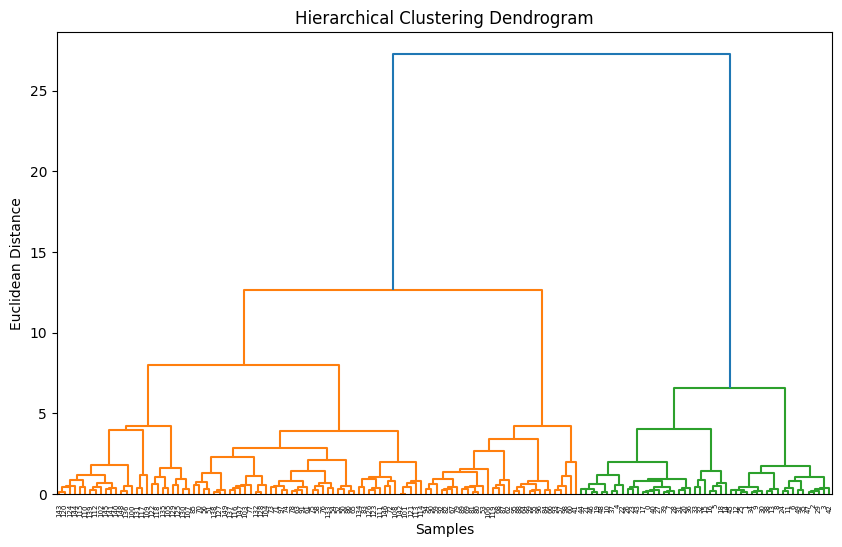

In [5]:
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

## Deciding number of clusters from Dendogram

In [6]:
clusters = fcluster(linked, t=3, criterion='maxclust')
df['Cluster'] = clusters

## Cluster

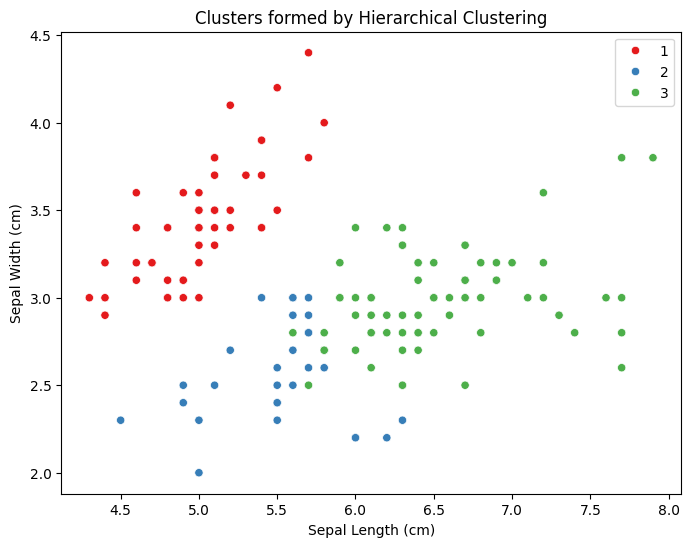

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=iris.data[:, 0], y=iris.data[:, 1], hue=clusters, palette='Set1')
plt.title('Clusters formed by Hierarchical Clustering')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

In [8]:
print(df.groupby('Cluster').mean())

         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
1                 5.016327          3.451020           1.465306   
2                 5.530000          2.566667           3.930000   
3                 6.546479          2.992958           5.267606   

         petal width (cm)  
Cluster                    
1                0.244898  
2                1.206667  
3                1.854930  
